# Working with categorical data

Categorical data can be split in 2 different kinds:
- Ordinal: having a natural order
- Nominal: they cannot be ordered

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('../data/adult.csv')

In [ ]:
df.info()

The object variables contain strings.
Pandas try to infer the type of each column. Categories are not directly flagged as categorical data but as strings.


In [ ]:
df.describe()

In [ ]:
# What's the amount of different values of each variable?
df.nunique()

In [ ]:
# What are the different values of a specific variable?
df.workclass.value_counts()

In [ ]:
# And their relative frequences
df.workclass.value_counts(normalize=True)

Object types can be converted into categorical ones by using the astype method:

In [ ]:
df['marital.status'] = df['marital.status'].astype('category')

In [ ]:
df['marital.status'].dtype

In [ ]:
# Creating categorical series

my_data = ['A', 'A', 'B', 'A', 'C', 'B']

# Unordered
my_series1 = pd.Series(my_data, dtype='category')
print(my_series1)

In [ ]:
# Ordered
my_series2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True)
print(my_series2)

Categorical data helps reducing memory footprint by a lot.

In order to benefit from lower memory requirements right from the beginning there is a way to pass the dtypes of the variables when reading from the source:

In [ ]:
df_dtypes={
"marital.status": "category"
}

df = pd.read_csv('../data/adult.csv', dtype=df_dtypes)

df.dtypes


## Grouping data by categories



In [ ]:
df = pd.read_csv('../data/adult.csv')

#the following
df1 = df[df["income"]=="<=50K"]
df2 = df[df["income"]==">50K"]
#can be replaced by 
groupby_object = df.groupby(by=["income"])

In [ ]:
#We can use now functions like countm sum, mean... or our own custom functions
groupby_object.size()

In [ ]:
groupby_object[["education.num", "age"]].sum()

In [ ]:
groupby_object = df.groupby(by=["income", "marital.status"])

In [ ]:
groupby_object[["education.num", "age"]].sum()

## Setting categorical variables

In this section we are going to see how we can manipulate categories. For the most part we are going to use the *.cat* accessor.

In [ ]:
dogs = pd.read_csv('../data/ShelterDogs.csv')

In [ ]:
dogs.info()

In [ ]:
dogs["coat"] = dogs["coat"].astype("category")

In [ ]:
dogs["coat"].value_counts()

In [ ]:
# Setting the categories will assing a null categorie to the eventual categories previously assigned but not included in the list
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"])

In [ ]:
dogs["coat"].value_counts(dropna=False)

The wirehaired category is now gone

In [ ]:
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories=["short", "medium", "long"], 
    ordered=True
)
dogs["coat"].head(3)

In [ ]:
#In the case of likes_people, there is a lot of null values

dogs['likes_people'].value_counts(dropna=False)

In [ ]:
dogs["likes_people"] = dogs["likes_people"].astype("category")
dogs["likes_people"] = dogs["likes_people"].cat.add_categories(["did not check", "could not tell"])

In [ ]:
dogs["likes_people"].value_counts(dropna=False)

In [ ]:
#We can remove categories as well
dogs['coat'] = dogs['coat'].cat.remove_categories(removals=['wirehaired'])

## Updating and collapsing categories

In [ ]:
dogs['breed'] = dogs['breed'].astype('category')

In [ ]:
dogs['breed'].value_counts()

In [ ]:
#Renaming one or more categories
dogs['breed'] = dogs['breed'].cat.rename_categories(new_categories={
   'Unknown Mix': 'Unknown'
})

In [ ]:
dogs['breed'].value_counts()

In [ ]:
# Renaming can be done with lambdas too
dogs['sex'] = dogs['sex'].astype('category')
dogs['sex'] = dogs['sex'].cat.rename_categories(lambda x: x.title())

In [ ]:
dogs['sex'].value_counts()

In [ ]:
dogs['color'] = dogs['color'].astype("category")
print(dogs['color'].cat.categories)

In [ ]:
update_colors = {
    "black and brown": "black",
    "black and tan": "black",
    "black and white": "black"
}

In [ ]:
dogs["main_color"] = dogs["color"].replace(update_colors)

In [ ]:
dogs["main_color"].value_counts()

In [ ]:
dogs["main_color"].dtype

## Reordering Categories

In [ ]:
dogs = pd.read_csv('../data/ShelterDogs.csv')

dogs['coat'] = dogs['coat'].astype('category')
dogs['coat'] = dogs['coat'].cat.reorder_categories(
    new_categories=['short', 'medium', 'wirehaired', 'long'],
    ordered=True
)

dogs['coat'].cat.categories

In [ ]:
#The order is taken into account to display the results of the grouping
dogs.groupby(by='coat')['age'].mean()

## Cleaning and accessing data

There are several kinds of issues we can face when dealing with categorical data:
- Inconsistent values
- Misspelled values
- Wrong dtype after corrections

To identify them we can use either the cat.categories or the value_counts method.

For fixing the inconsistent values we can use the same methods as for fixing strings:
- str.strip()
- str.title(), upper() or lower()
- str.mapping(dict)

Dont forget to check the dtype after the change

To access data we can use .str.contains(string or regex)

In [ ]:
# Accessing data with loc

dogs.loc[dogs['get_along_cats']=='yes', "size"]

In [ ]:
dogs.loc[dogs['get_along_cats']=='yes', "size"].value_counts(sort=False)

## Using categorical data in visualization

Seaborn has a kind of plot for categories, called catplot

In [123]:
df = pd.read_csv('../data/lasvegas_tripadvisor.csv')

In [124]:
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


In [125]:
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.844650,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

Catplot has the following parameters:
- x
- y
- data
- kind: strip, swarm, box, violin, boxen, point, bar, count

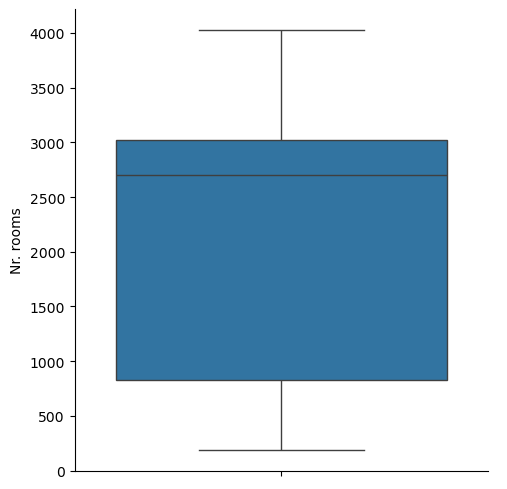

In [130]:
sns.catplot(data=df, y='Nr. rooms', kind='box')

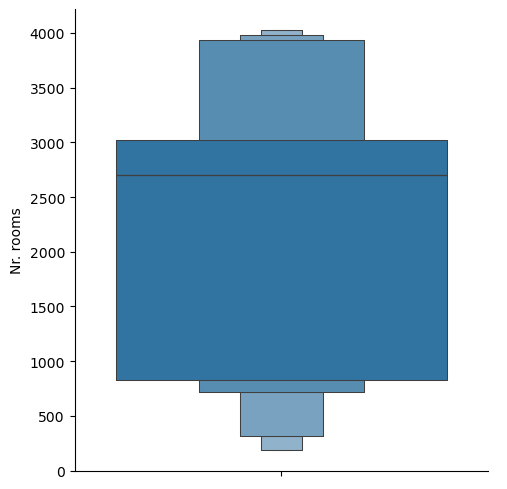

In [131]:
sns.catplot(data=df, y='Nr. rooms', kind='boxen')

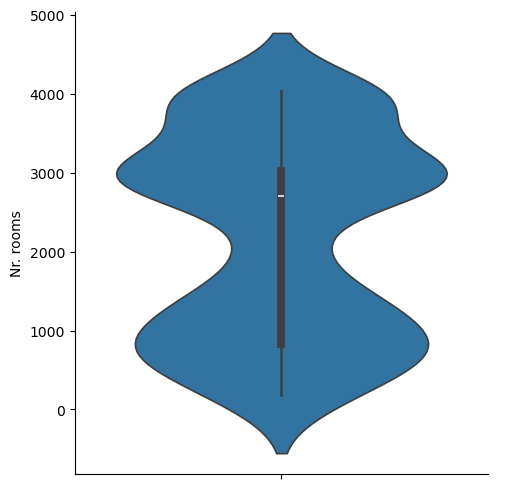

In [132]:
sns.catplot(data=df, y='Nr. rooms', kind='violin')

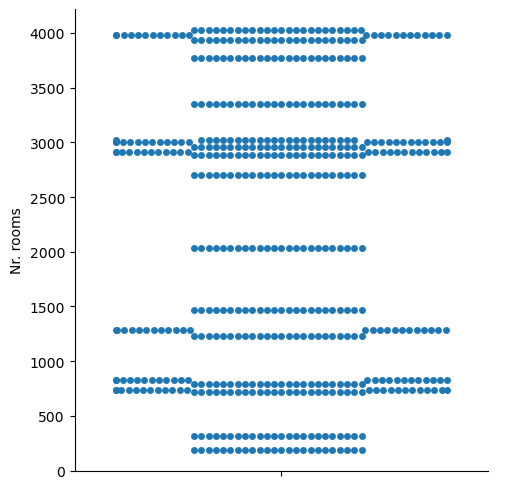

In [133]:
sns.catplot(data=df, y='Nr. rooms', kind='swarm')

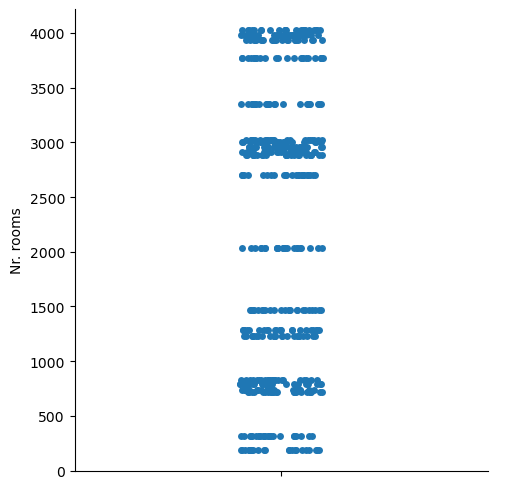

In [134]:
sns.catplot(data=df, y='Nr. rooms', kind='strip')

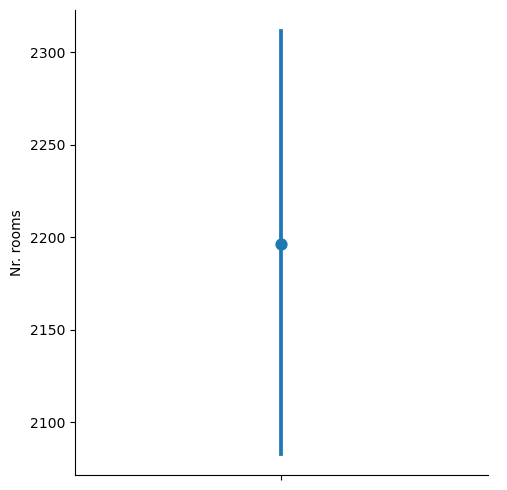

In [135]:
sns.catplot(data=df, y='Nr. rooms', kind='point')

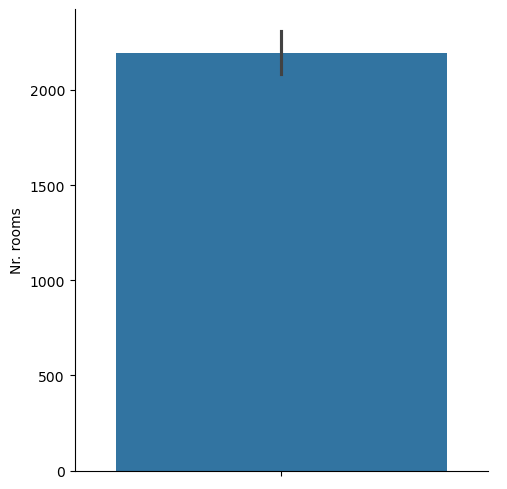

In [136]:
sns.catplot(data=df, y='Nr. rooms', kind='bar')

In [138]:
df['Score'].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

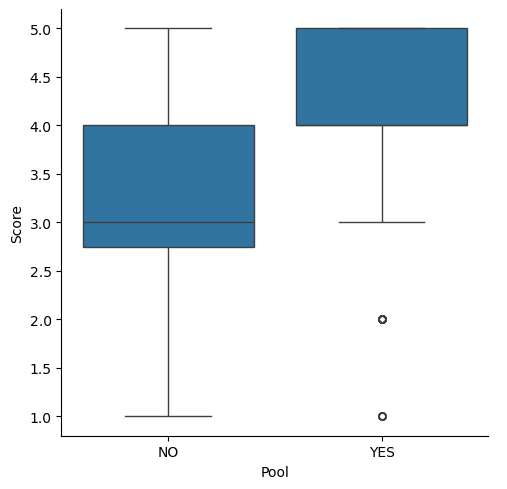

In [139]:
sns.catplot(x='Pool', y='Score', data=df, kind='box')

In [140]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')

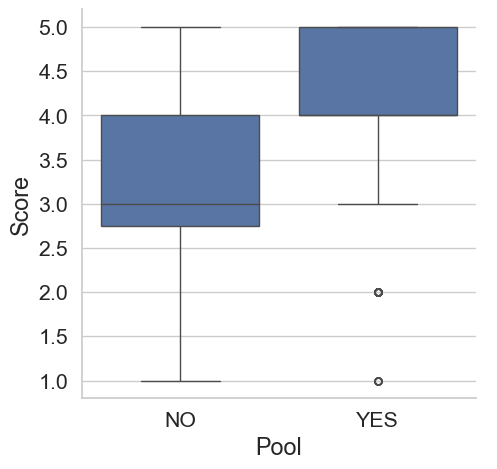

In [141]:
sns.catplot(x='Pool', y='Score', data=df, kind='box')

<Axes: xlabel='Traveler type'>

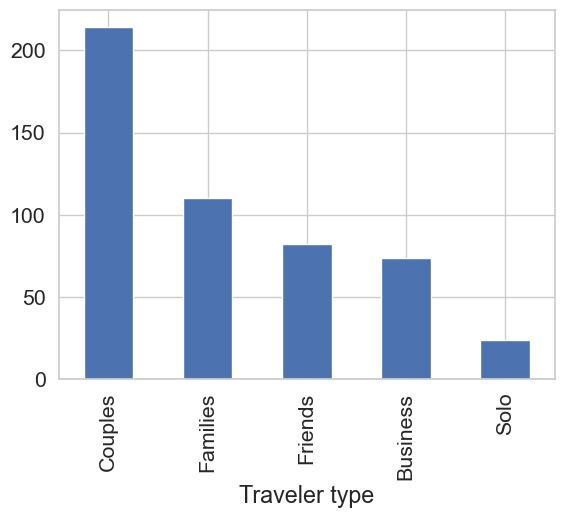

In [142]:
#Pandas offers a way to plot barcharts out of the box:
df['Traveler type'].value_counts().plot.bar()

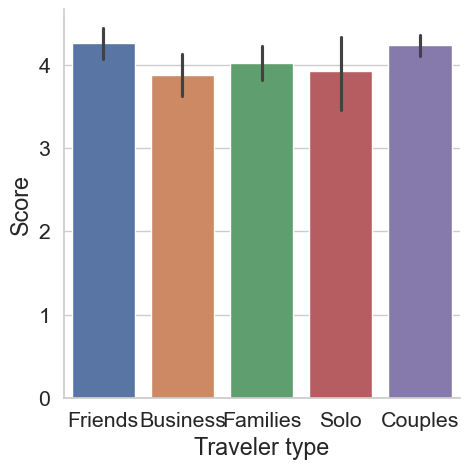

In [145]:
#Seaborn goes beyond this simple plot and allow us to analyze numerical variables through categorical ones
sns.catplot(x='Traveler type', hue='Traveler type', y='Score', data=df, kind='bar')

Sns barplot represents with the height of each bar, the point estimate of the mean of the data. 

The black band represent the confidence interval for that value. That means, the range of values we are confident at 95% that the observations will fall in.

### Ordering categories

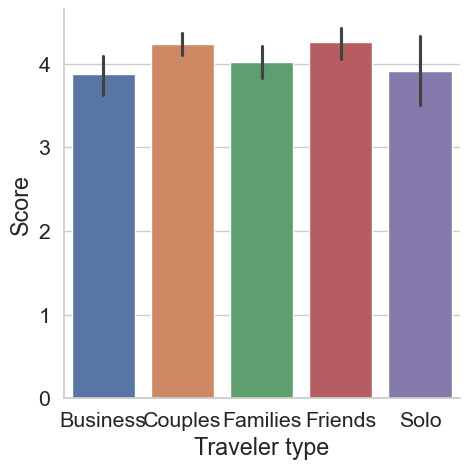

In [148]:
df['Traveler type'] = df['Traveler type'].astype('category')
df['Traveler type'].cat.categories

sns.catplot(x='Traveler type', hue='Traveler type', y='Score', data=df, kind='bar')

The catplot method has a "order" attribute, but its way more preferable to use the category order since that would be applied to every single graph, and not only.

### The hue parameter

Adds a color difference depending on the category

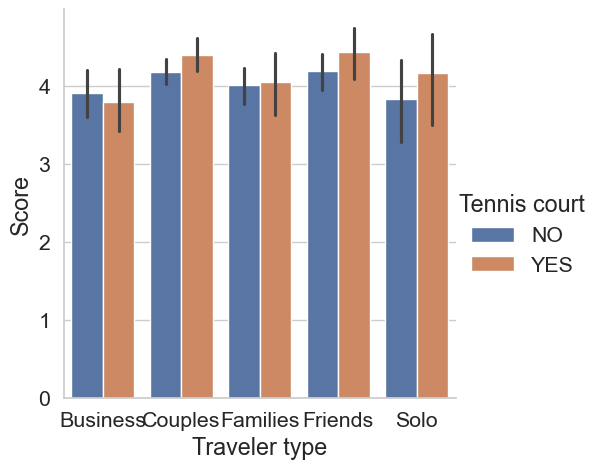

In [150]:
sns.catplot(x='Traveler type', hue='Tennis court', y='Score', data=df, kind='bar')

## Point and count plot

The point plot connects the means of the categories helping understanding the eventual difference between them. Confidence intervals are represented as well.

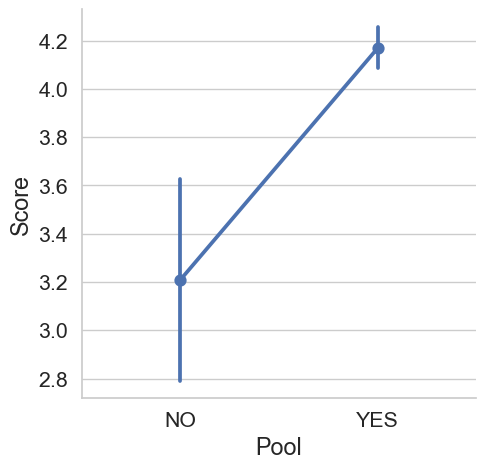

In [153]:
sns.catplot(x='Pool', y='Score', data=df, kind='point')

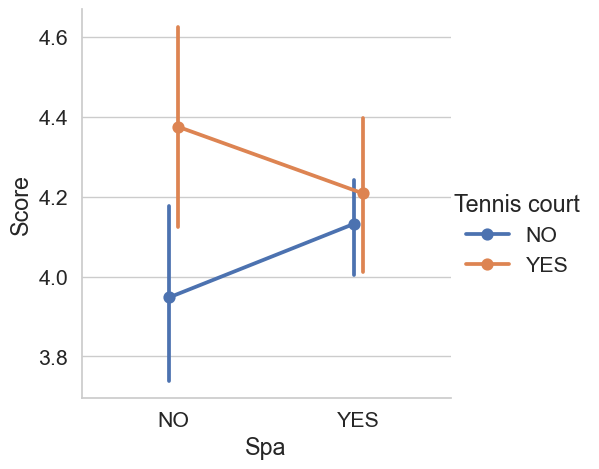

In [154]:
sns.catplot(x='Spa', y='Score', data=df, kind='point', hue='Tennis court', dodge=True)

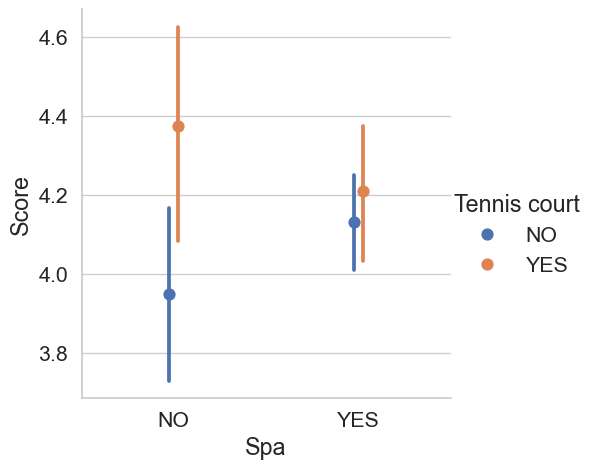

In [155]:
sns.catplot(x='Spa', y='Score', data=df, kind='point', hue='Tennis court', dodge=True, join=False)

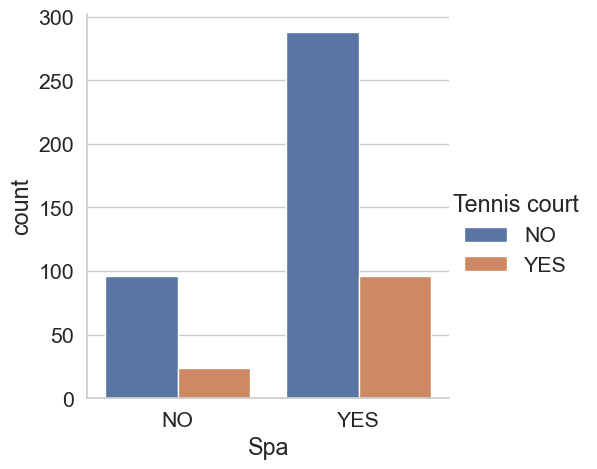

In [157]:
sns.catplot(x='Spa', data=df, kind='count', hue='Tennis court')

## The challenge of displaying several categories at the same time

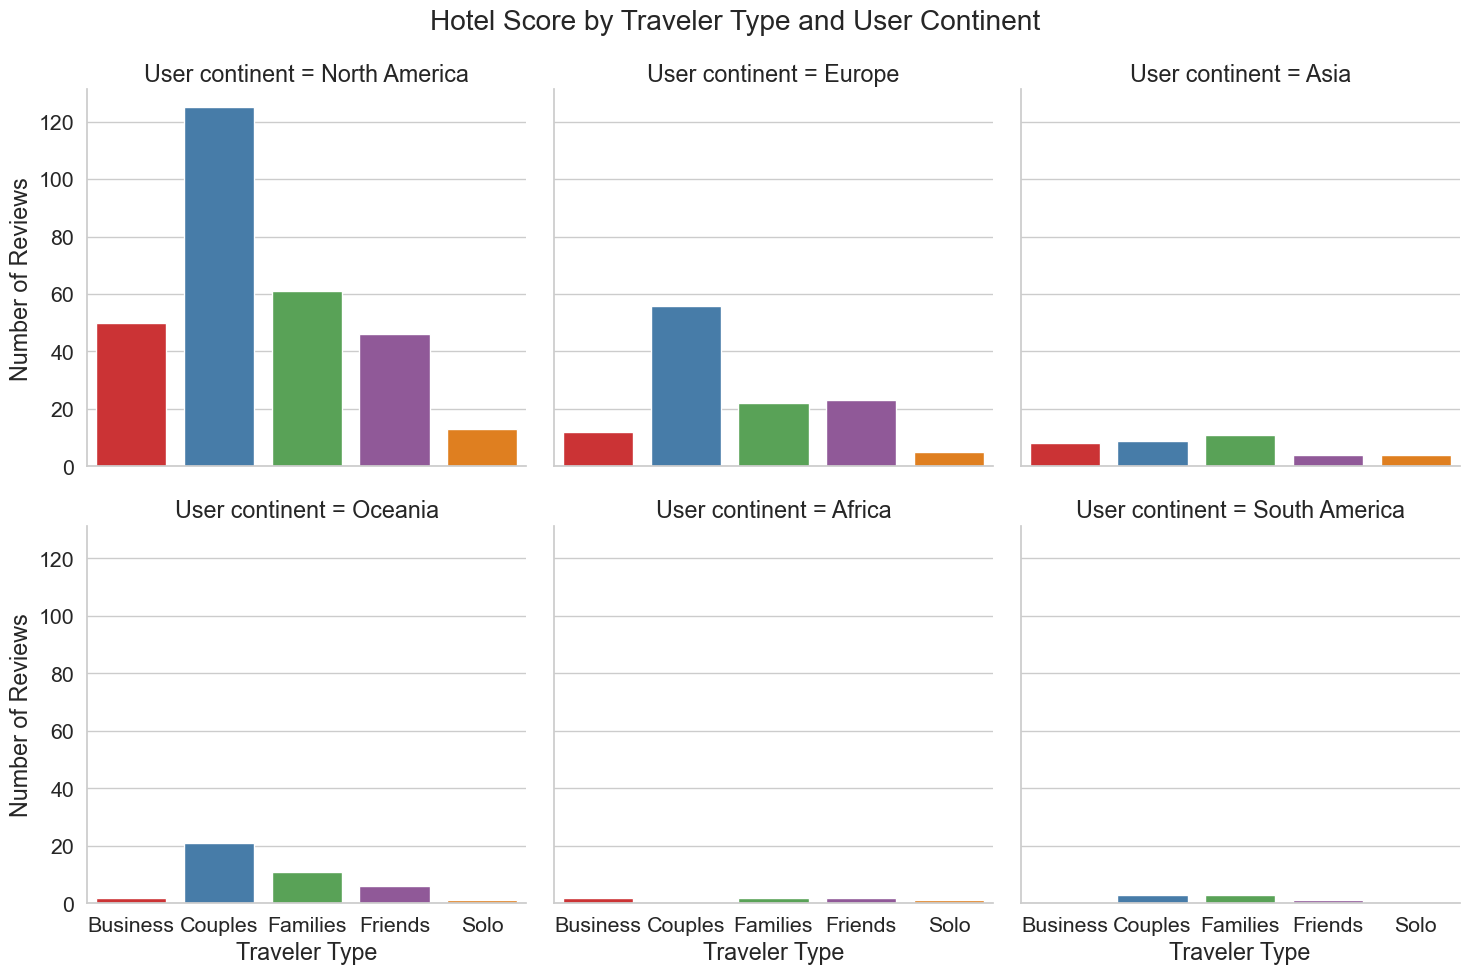

In [162]:
ax = sns.catplot(x='Traveler type', 
            kind='count', 
            col='User continent', 
            col_wrap=3, 
            palette=sns.color_palette('Set1'), 
            data=df)

ax.fig.suptitle('Hotel Score by Traveler Type and User Continent')
ax.set_axis_labels("Traveler Type", 'Number of Reviews')
plt.subplots_adjust(top=.9)


## Categorical Pitfalls

The first one is related to the memory footprint reduction associated with the usage of categories. It wont happen in case of the variable having a big number of different values.

In [190]:
df = pd.read_csv('../data/cars.csv')

In [191]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [181]:
df.manufacturer_name.nunique()

55

In [182]:
df.manufacturer_name.nbytes

308248

In [183]:
df.manufacturer_name.astype('category').nbytes

38971

In [184]:
df.odometer_value.nbytes

308248

In [185]:
df.odometer_value.astype('category').nbytes

125566

In [186]:
df.odometer_value.nunique()

6063

The memory saving on odometer_value is quite limited compared to what happens with manufacturer_name

Using categories can be frustrating as well because:
- using .str accessor object to manipulate data converts the Series into objects
- The .apply() method outputs a new Series as an object
- The common methods of adding, removing, replacing or setting categories do not handle missing categories the same way
- Numpy functions generally do not work with categorical Series


In [187]:
#Double check the variable is still a category after an operationabs
df['color']=df['color'].astype('category')
df['color']=df['color'].str.upper()
print(df['color'].dtype)


object


In [188]:
df['color']=df['color'].astype('category')
print(df['color'].dtype)

category


In [201]:
#Check the missing values
df['color']=df['color'].astype('category')
df['color']=df['color'].cat.set_categories(['black', 'silver', 'blue'])
df['color'].value_counts(dropna=False)

color
NaN       18172
black      7705
silver     6852
blue       5802
Name: count, dtype: int64

## Label Encoding

It codes each category with an integer from 0 to n-1 where n is the number of different categories.
-1 is often use to encode missing values.
Label encoding is often used to save memory

The method cat.codes is used to crete codes:


In [203]:
df['manufacturer_name'] = df['manufacturer_name'].astype('category')

In [204]:
df['manufacturer_code'] = df['manufacturer_name'].cat.codes

In [205]:
df[['manufacturer_code', 'manufacturer_name']]

,manufacturer_code,manufacturer_name
0,45,Subaru
1,45,Subaru
2,45,Subaru
3,45,Subaru
4,45,Subaru
...,...,...
38526,8,Chrysler
38527,8,Chrysler
38528,8,Chrysler
38529,8,Chrysler


If we want to create a code book with the codes and names for later manipulation we can do so thanks to python's zip method:

In [206]:
name_map = dict(zip(df.manufacturer_code, df.manufacturer_name))

In [207]:
name_map

{45: 'Subaru',
 24: 'LADA',
 12: 'Dodge',
 54: 'УАЗ',
 23: 'Kia',
 35: 'Opel',
 53: 'Москвич',
 1: 'Alfa Romeo',
 0: 'Acura',
 10: 'Dacia',
 27: 'Lexus',
 33: 'Mitsubishi',
 25: 'Lancia',
 9: 'Citroen',
 32: 'Mini',
 21: 'Jaguar',
 38: 'Porsche',
 44: 'SsangYong',
 11: 'Daewoo',
 15: 'Geely',
 50: 'ВАЗ',
 13: 'Fiat',
 14: 'Ford',
 39: 'Renault',
 42: 'Seat',
 40: 'Rover',
 48: 'Volkswagen',
 28: 'Lifan',
 22: 'Jeep',
 5: 'Cadillac',
 2: 'Audi',
 52: 'ЗАЗ',
 47: 'Toyota',
 51: 'ГАЗ',
 49: 'Volvo',
 7: 'Chevrolet',
 16: 'Great Wall',
 4: 'Buick',
 37: 'Pontiac',
 29: 'Lincoln',
 18: 'Hyundai',
 34: 'Nissan',
 46: 'Suzuki',
 3: 'BMW',
 30: 'Mazda',
 26: 'Land Rover',
 20: 'Iveco',
 43: 'Skoda',
 41: 'Saab',
 19: 'Infiniti',
 6: 'Chery',
 17: 'Honda',
 31: 'Mercedes-Benz',
 36: 'Peugeot',
 8: 'Chrysler'}

In [208]:
#to convert codes back into names:
df['manufacturer_code'].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

In [209]:
# To create a van code 
df['van_code'] = np.where (df['body_type'].str.contains('van', regex=False), 1, 0)

In [211]:
df['van_code'].value_counts()

van_code
0    34115
1     4416
Name: count, dtype: int64

### One hot encoding 

Very helpful for machine learning data preparation.

The pandas get_dummies method does this

In [213]:
df[['odometer_value', 'color']].head()

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,NaN
3,10000,blue
4,280000,black


In [214]:
df_onehot = pd.get_dummies(df[['odometer_value', 'color']])

In [215]:
df_onehot.head()

,odometer_value,color_black,color_silver,color_blue
0,190000,False,True,False
1,290000,False,False,True
2,402000,False,False,False
3,10000,False,False,True
4,280000,True,False,False


In [217]:
df_onehot = pd.get_dummies(df, columns=['color'], prefix='onehot')

In [218]:
df_onehot

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_code,van_code,onehot_black,onehot_silver,onehot_blue
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,False,True,True,True,16,45,0,False,True,False
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,False,False,False,True,83,45,0,False,False,True
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,False,False,True,True,151,45,0,False,False,False
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,86,45,0,False,False,True
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,False,False,False,True,7,45,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,290000,2000,gasoline,False,gasoline,3.5,sedan,...,False,False,True,True,301,8,0,False,True,False
38527,Chrysler,PT Cruiser,mechanical,321000,2004,diesel,False,diesel,2.2,hatchback,...,False,False,True,True,317,8,0,False,False,True
38528,Chrysler,300,automatic,777957,2000,gasoline,False,gasoline,3.5,sedan,...,False,False,True,True,369,8,0,False,False,True
38529,Chrysler,PT Cruiser,mechanical,20000,2001,gasoline,False,gasoline,2.0,minivan,...,False,False,False,True,490,8,1,True,False,False
